In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Image Augmentation


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,vertical_flip=True,zoom_range=0.3)

In [6]:
test_datagen=ImageDataGenerator(rescale=1.0/25)

### Spliting the train and test set

In [8]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders

In [10]:
splitfolders.ratio("/content/drive/MyDrive/nalaya thiran/flowers",output="/content/drive/MyDrive/nalaya thiran/flowers_dataset",move=True,ratio=(0.7,0.3,0.0))

Copying files: 4327 files [00:21, 201.09 files/s]


### Continuing data augmentation

In [14]:
x_train= train_datagen.flow_from_directory(r"/content/drive/MyDrive/nalaya thiran/flowers_dataset/train",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3026 images belonging to 5 classes.


In [15]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [32]:
x_test= test_datagen.flow_from_directory(r"/content/drive/MyDrive/nalaya thiran/flowers_dataset/test",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 5 images belonging to 5 classes.


### Model creation

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [21]:
model = Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [30]:
model.add(Dense(5,activation="softmax"))


In [31]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### fitting the model

In [33]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
127/127 [==============================] - 1080s 8s/step - loss: 1.3802 - accuracy: 0.4438 - val_loss: 5.9263 - val_accuracy: 0.4000
Epoch 2/10
127/127 [==============================] - 30s 238ms/step - loss: 1.0946 - accuracy: 0.5565 - val_loss: 8.3239 - val_accuracy: 0.6000
Epoch 3/10
127/127 [==============================] - 31s 240ms/step - loss: 1.0275 - accuracy: 0.5839 - val_loss: 8.6903 - val_accuracy: 0.4000
Epoch 4/10
127/127 [==============================] - 31s 243ms/step - loss: 0.9843 - accuracy: 0.6117 - val_loss: 7.8105 - val_accuracy: 0.6000
Epoch 5/10
127/127 [==============================] - 33s 256ms/step - loss: 0.9544 - accuracy: 0.6206 - val_loss: 8.9049 - val_accuracy: 0.6000
Epoch 6/10
127/127 [==============================] - 31s 243ms/step - loss: 0.8873 - accuracy: 0.6530 - val_loss: 10.5686 - val_accuracy: 0.6000
Epoch 7/10
127/127 [==============================] - 31s 245ms/step - loss: 0.8883 - accuracy: 0.6530 - val_loss: 9.2488 - val_ac

In [35]:
model.save("flowers_classifier.h5")

### Testing the model (taking the image of a daisy flower)

In [37]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('flowers_classifier.h5')

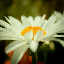

In [41]:
img=image.load_img(r"/content/drive/MyDrive/nalaya thiran/flowers_dataset/test/daisy/5973488341_50bdf6cee3_n.jpg",target_size=(64,64))
img

In [43]:
img_pixels=image.img_to_array(img)
img_pixels

array([[[24., 26.,  2.],
        [22., 24.,  0.],
        [19., 21.,  0.],
        ...,
        [21., 15.,  1.],
        [24., 17.,  0.],
        [27., 20.,  1.]],

       [[31., 30.,  0.],
        [32., 31.,  0.],
        [27., 27.,  1.],
        ...,
        [20., 12.,  1.],
        [23., 16.,  0.],
        [25., 18.,  0.]],

       [[36., 36.,  0.],
        [33., 35.,  0.],
        [33., 32.,  1.],
        ...,
        [19., 11.,  0.],
        [19., 11.,  0.],
        [21., 13.,  2.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [45]:
img_pixels=np.expand_dims(img_pixels,axis=0)

In [46]:
pred=model.predict(img_pixels)

In [47]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [48]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [50]:
index=[]
for i in x_test.class_indices.keys():
  index.append(i)

In [52]:
index[np.argmax(pred)]

'daisy'